## 1. Loading the Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('../data/benin-malanville.csv')  # Replace with actual file names
df2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
df3 = pd.read_csv('../data/togo-dapaong_qc.csv')

## 2 understanding the Dataset

In [13]:
print("Dataset 1:")
print(df1.head())

print("Dataset 2:")
print(df2.head())

print("Dataset 3:")
print(df3.head())
# Display summary statistics for each dataset
print("Dataset 1 Summary Statistics:")
print(df1.describe())

print("\nDataset 2 Summary Statistics:")
print(df2.describe())

print("\nDataset 3 Summary Statistics:")
print(df3.describe())


Dataset 1:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
Dataset 2

## 3. checking if ther are any missing values


In [14]:
columns_to_check = ['GHI', 'DNI', 'DHI']
for df in [df1, df2, df3]:
    df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

C:\Users\user\AppData\Local\Temp\ipykernel_2092\3137696710.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_2092\3137696710.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_2092\3137696710.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI           

## converting date to datetime

In [15]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])


# 4. Perform Exploratory Data Analysis (EDA) to identifying high-potential regions for solar installation

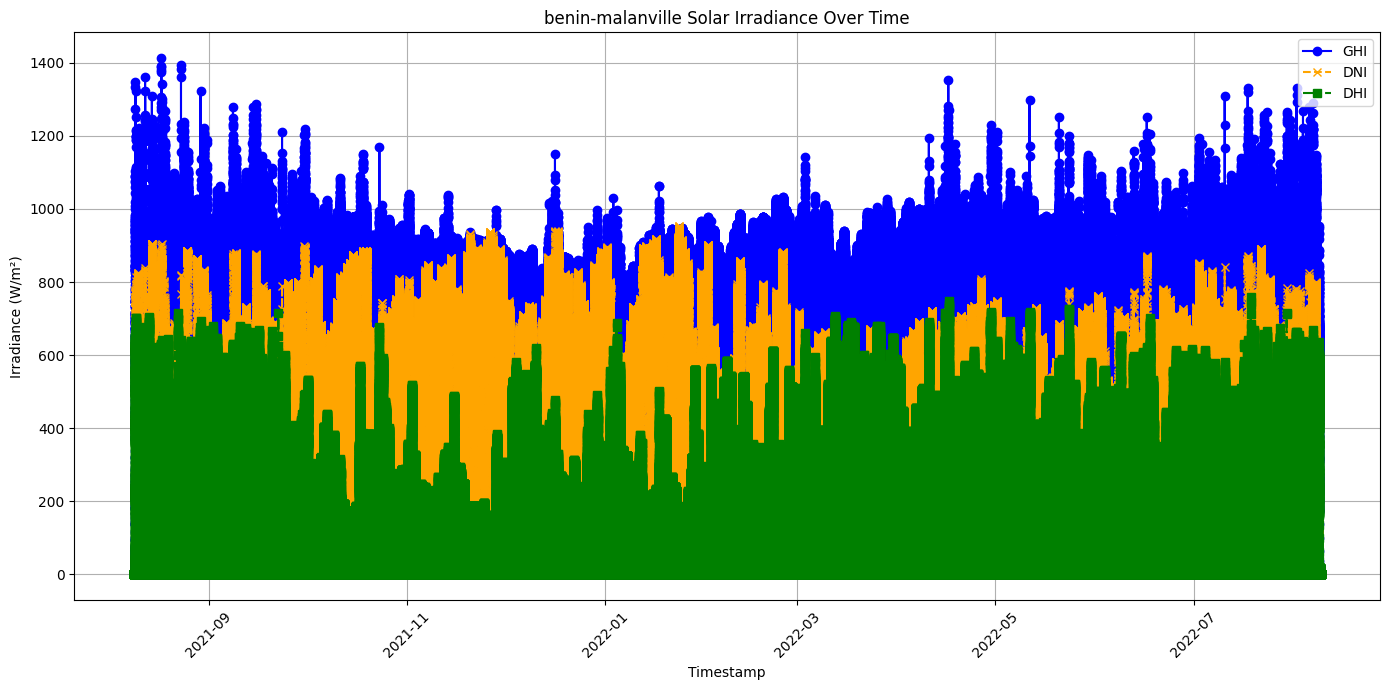

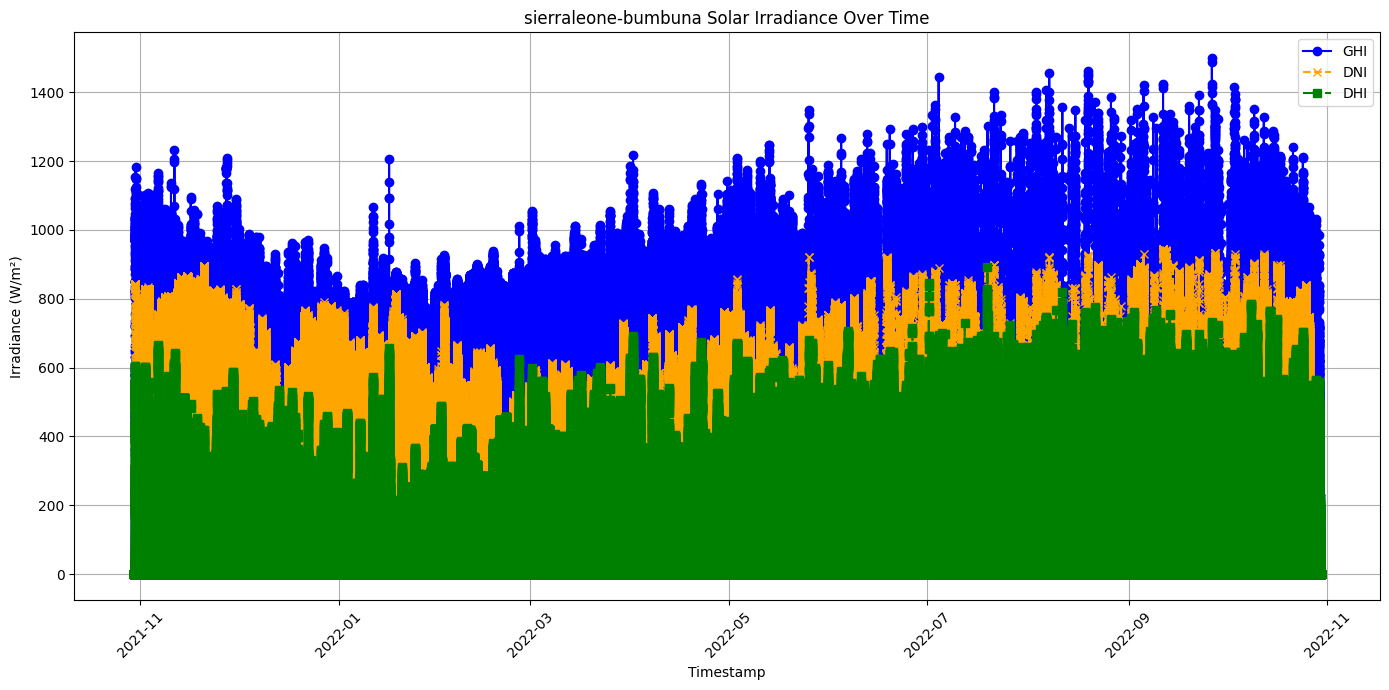

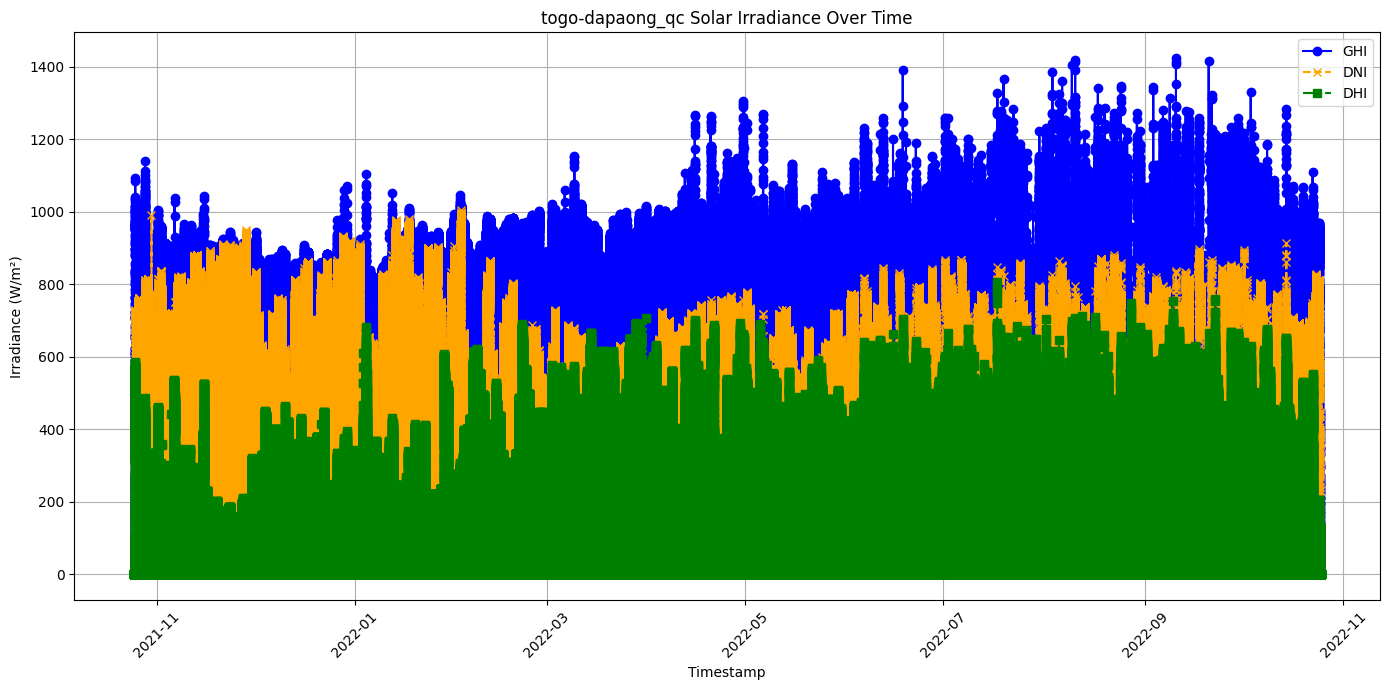

In [16]:
import matplotlib.pyplot as plt

def plot_time_series(df, country_name):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='blue', marker='o', linestyle='-')
    plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='orange', marker='x', linestyle='--')
    plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='green', marker='s', linestyle='-.')
    
    plt.title(f'{country_name} Solar Irradiance Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Irradiance (W/m²)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Example usage:
plot_time_series(df1, "benin-malanville")
plot_time_series(df2, "sierraleone-bumbuna")
plot_time_series(df3, "togo-dapaong_qc")


 ## Wind Analysis and Bubble Charts 

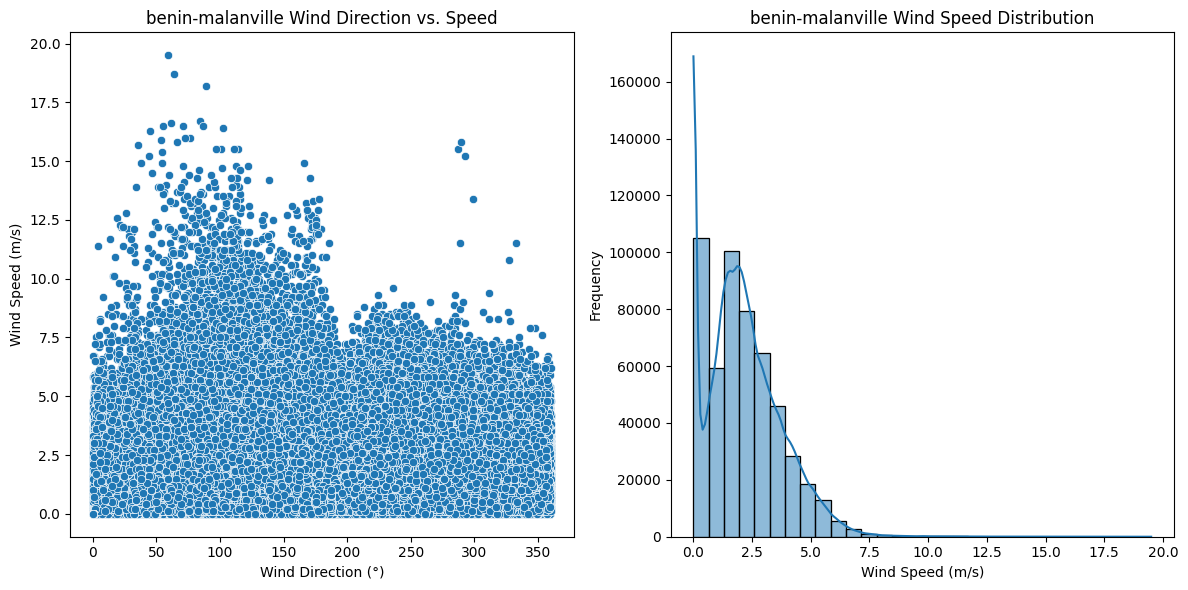

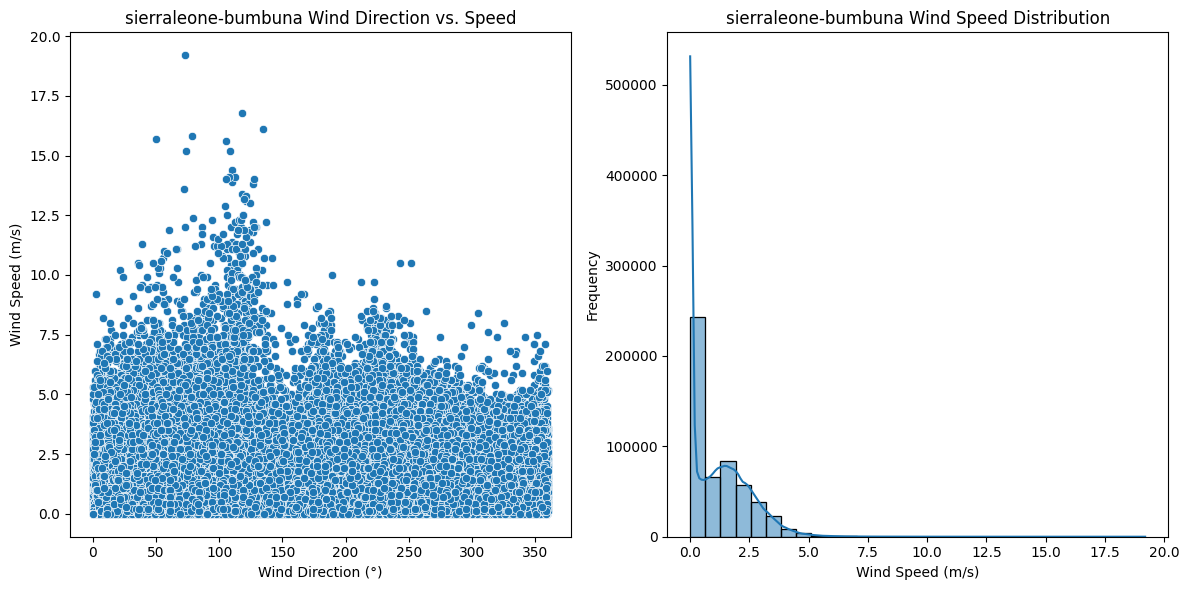

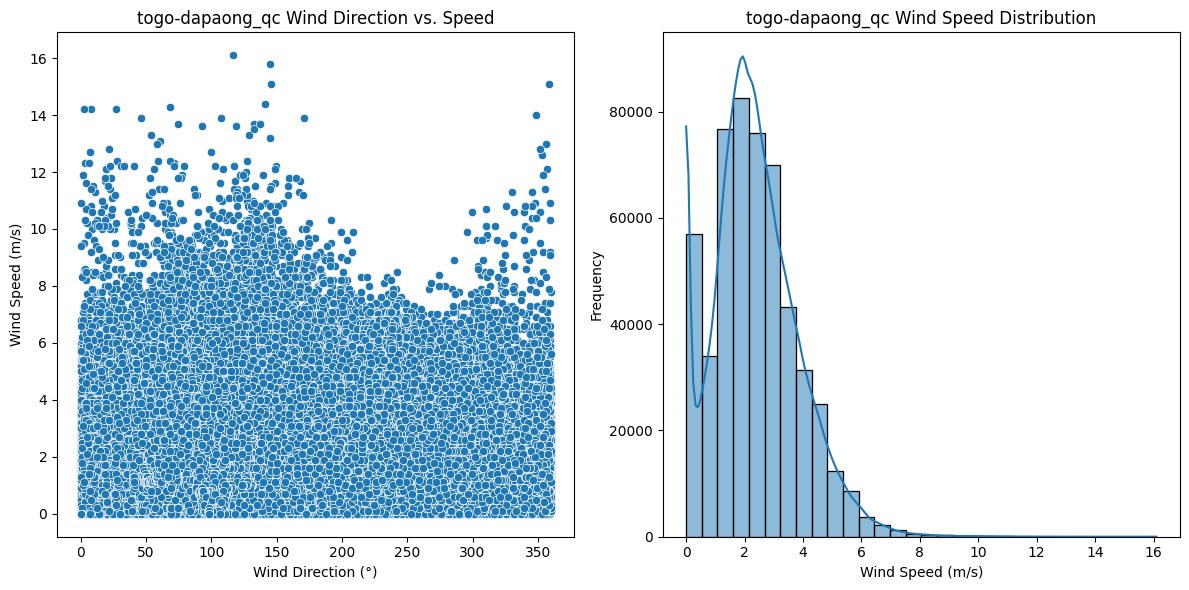

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_wind_analysis(df, country_name):
    plt.figure(figsize=(12, 6))
    
    # Wind Speed vs. Wind Direction
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='WD', y='WS', data=df)
    plt.title(f'{country_name} Wind Direction vs. Speed')
    plt.xlabel('Wind Direction (°)')
    plt.ylabel('Wind Speed (m/s)')
    
    # Wind Speed Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df['WS'], bins=30, kde=True)
    plt.title(f'{country_name} Wind Speed Distribution')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
# Example usage:benin-malanville
plot_wind_analysis(df1, "benin-malanville")
plot_wind_analysis(df2, "sierraleone-bumbuna")
plot_wind_analysis(df3, "togo-dapaong_qc")


## Z-Score Analysis

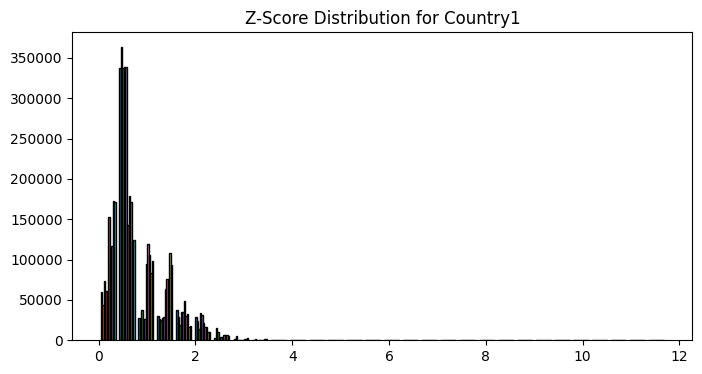

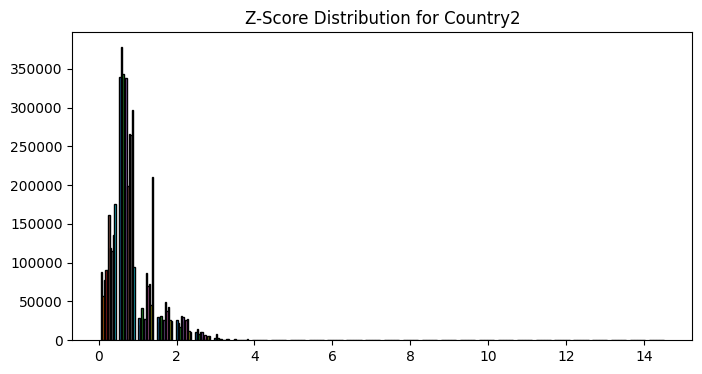

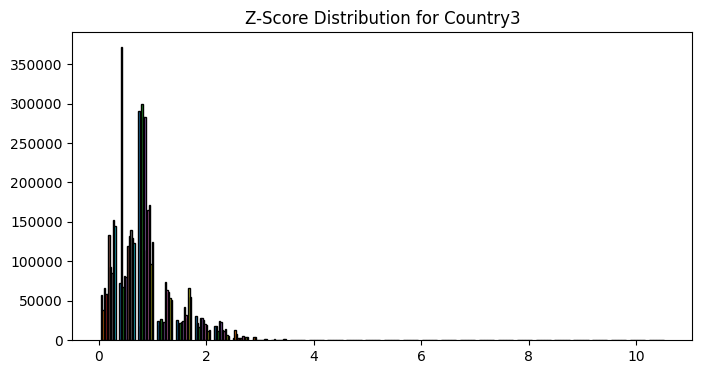

In [18]:
from scipy import stats
import numpy as np

# Function for Z-score analysis
def z_score_analysis(df, country_name):
    z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust']].dropna()))
    plt.figure(figsize=(8, 4))
    plt.hist(z_scores, bins=30, edgecolor='k')
    plt.title(f'Z-Score Distribution for {country_name}')
    plt.show()

# Perform Z-score analysis for each DataFrame
z_score_analysis(df1, 'Country1')
z_score_analysis(df2, 'Country2')
z_score_analysis(df3, 'Country3')


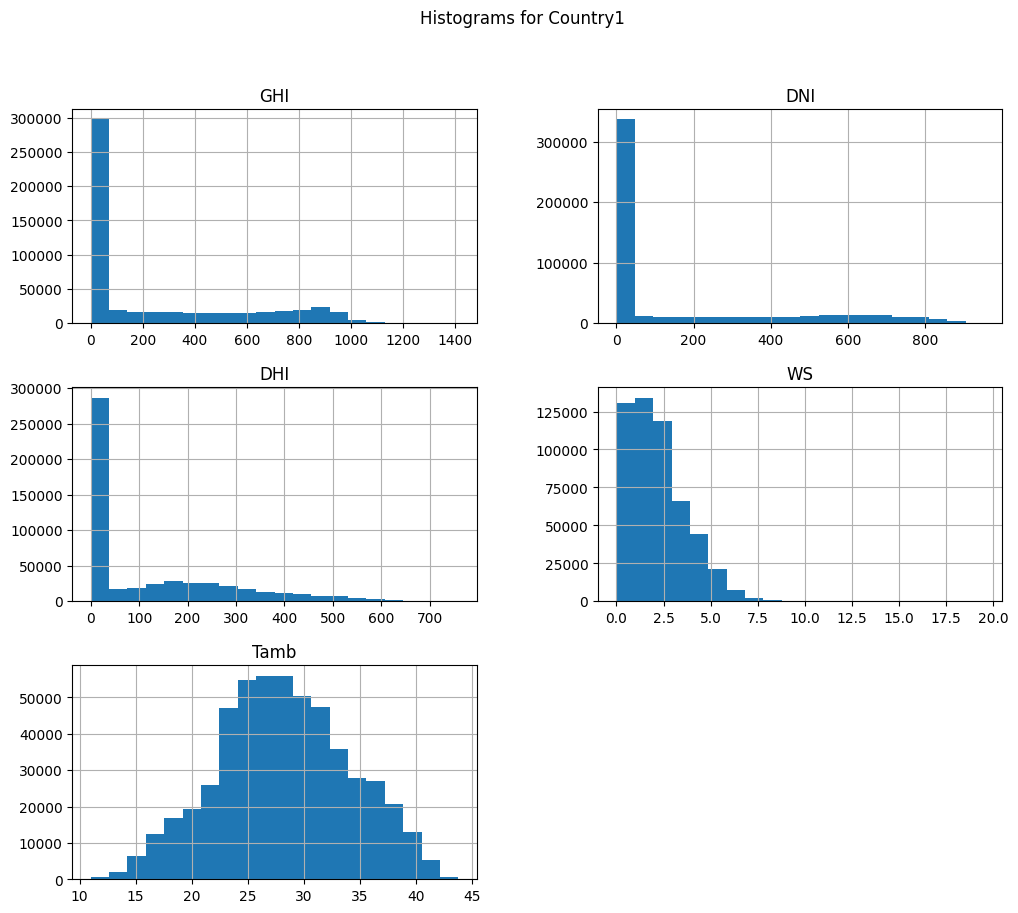

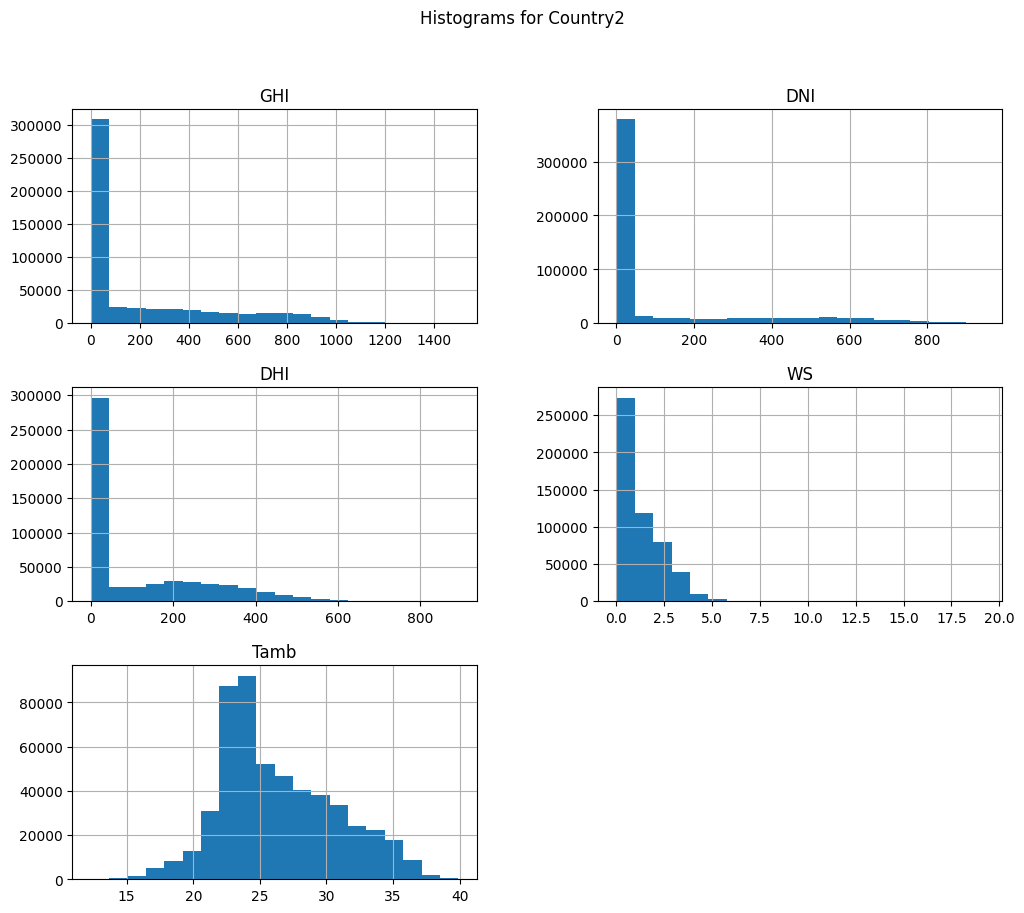

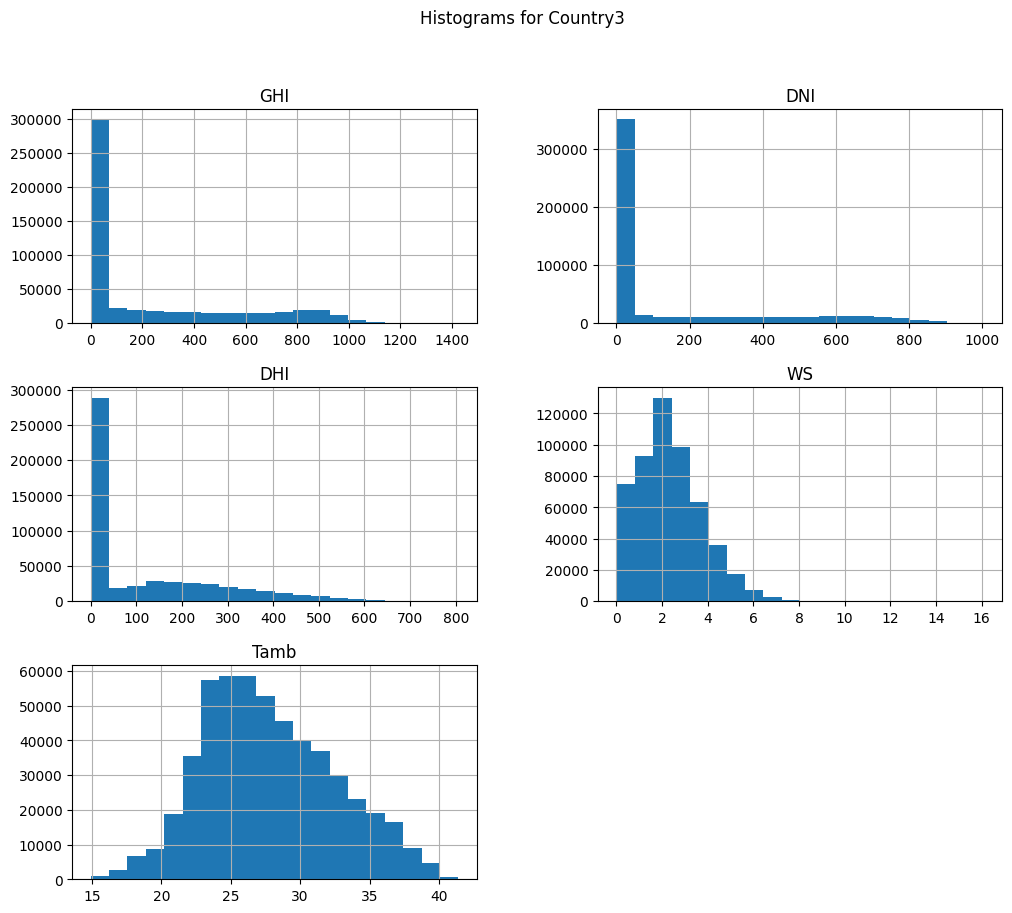

In [19]:
# Function for histograms
def plot_histograms(df, country_name):
    df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=20, figsize=(12, 10))
    plt.suptitle(f'Histograms for {country_name}')
    plt.show()

# Perform histograms analysis for each DataFrame
plot_histograms(df1, 'Country1')
plot_histograms(df2, 'Country2')
plot_histograms(df3, 'Country3')


## Time Series Analysis

c:\Users\user\Desktop\radiation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


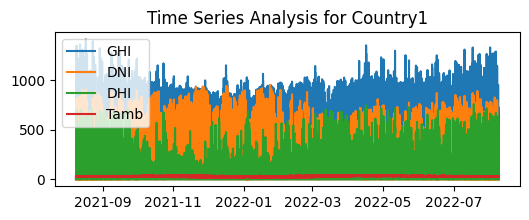

c:\Users\user\Desktop\radiation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


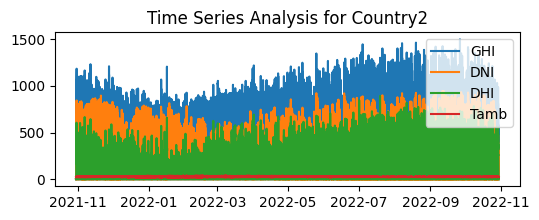

c:\Users\user\Desktop\radiation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


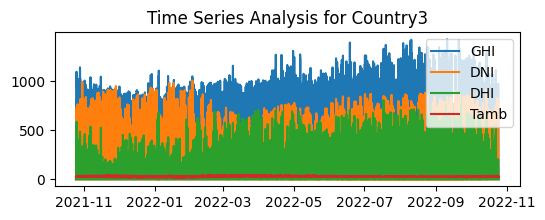

In [20]:
# Function for time series analysis
def time_series_analysis(df, country_name):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    
    plt.figure(figsize=(6, 2))
    plt.plot(df['GHI'], label='GHI')
    plt.plot(df['DNI'], label='DNI')
    plt.plot(df['DHI'], label='DHI')
    plt.plot(df['Tamb'], label='Tamb')
    plt.legend()
    plt.title(f'Time Series Analysis for {country_name}')
    plt.show()

# Perform time series analysis for each DataFrame
time_series_analysis(df1, 'Country1')
time_series_analysis(df2, 'Country2')
time_series_analysis(df3, 'Country3')


## Correlation Analysis

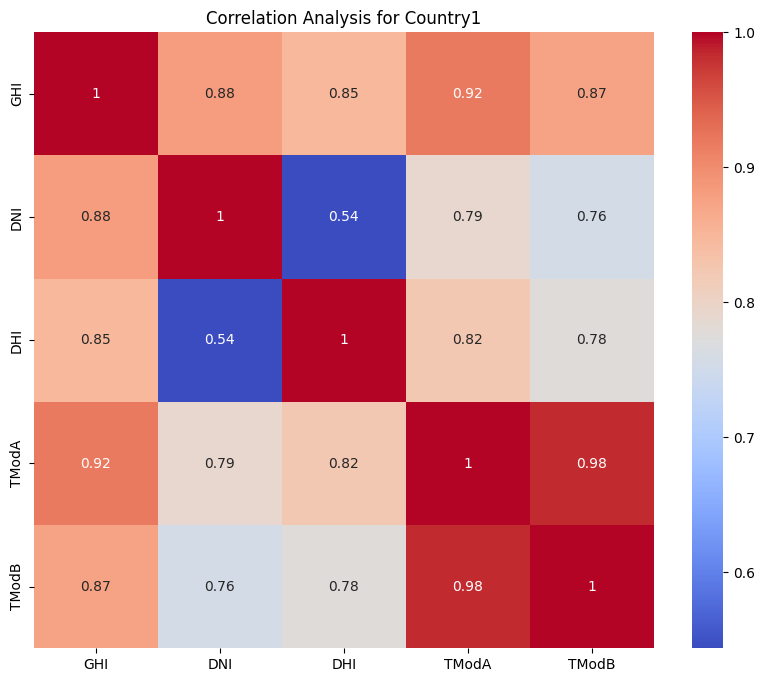

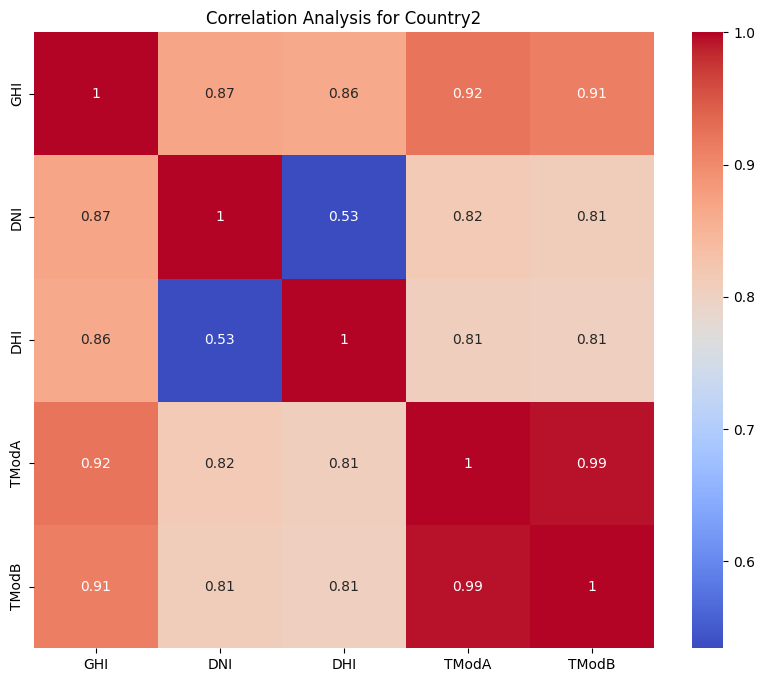

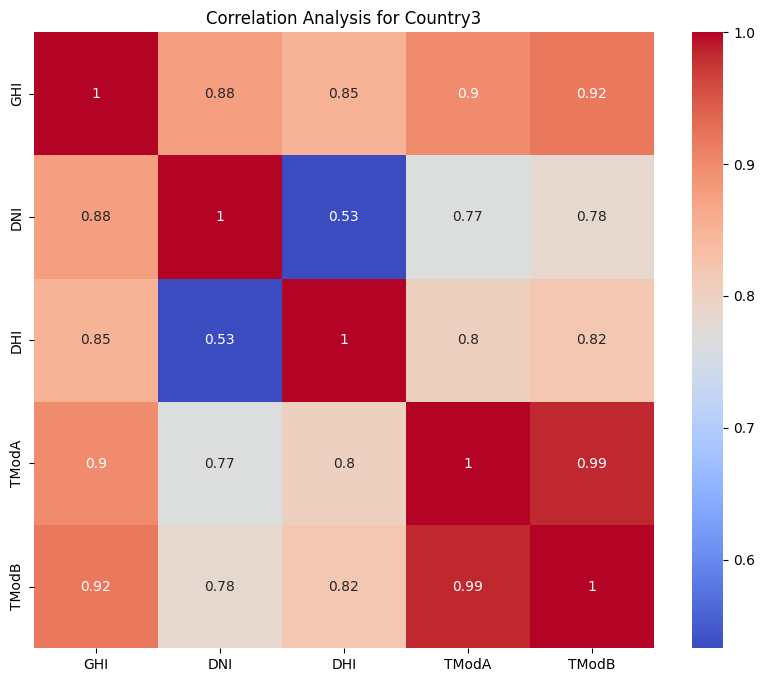

In [21]:
# Function for correlation analysis
def correlation_analysis(df, country_name):
    corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Analysis for {country_name}')
    plt.show()

# Perform correlation analysis for each DataFrame
correlation_analysis(df1, 'Country1')
correlation_analysis(df2, 'Country2')
correlation_analysis(df3, 'Country3')
